# Importing necessary Library

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Defining a function to apply shift:

This apply_shift() function will shift the signal by specified shift. The shift can be negative or positive

### $$z[n] = x[n-N]$$


In [39]:
def apply_shift(signal, shift):
    shifted_signal = np.roll(signal,shift)
    if(shift>=0):
        shifted_signal[0:shift] = 0
    else:
        shifted_signal[-1:shift] = 0
    
    return shifted_signal

# 2. Generating and visualizing the Impulse Response

This code block first geneates a step signal $u[n]$ and then applies a shift of $N$ to the step signal $u[n-N]$. Then the impulse response $h[n]$ for the system is computed using following equation:
### $$h[n] = u[n]-u[n-N]$$
Each signal is then visualized in the graph

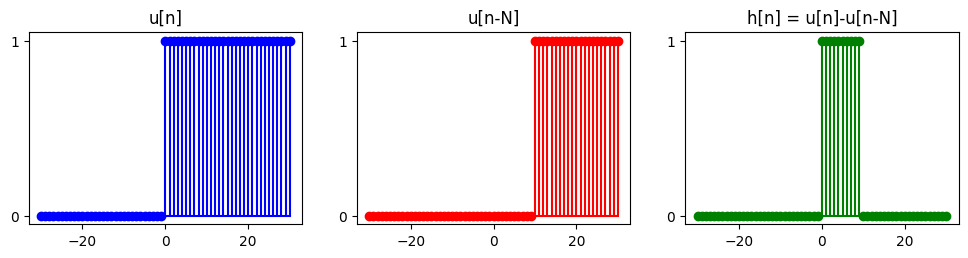

In [40]:
#generating and visualizing Impule Response

N = 10

simulation_length = 30 #for each positive and negative side 


indexes = np.arange(-simulation_length,simulation_length+1) #generating positive and negative indices for signal 
Un = np.where(indexes<0,0,1) #step function

#shifting step function by N
Un_N = apply_shift(Un,N)

Hn = Un - Un_N #impulse response

#visualizing the impulse response components
fig, ax = plt.subplots(1,3, figsize = (12,2.5))
ax[0].stem(indexes,Un,linefmt='b-', markerfmt='bo',basefmt='b-')
ax[0].set_title('u[n]')
ax[0].set_yticks([0,1])

ax[1].stem(indexes,Un_N, linefmt='r-', markerfmt='ro',basefmt='r-')
ax[1].set_title('u[n-N]')
ax[1].set_yticks([0,1])

ax[2].stem(indexes,Hn, linefmt='g-', markerfmt='go',basefmt='g-')
ax[2].set_title('h[n] = u[n]-u[n-N]')
ax[2].set_yticks([0,1])



# 3. Generating Input Signal

### $$x[n] = a^n \times u[n]$$

<StemContainer object of 3 artists>

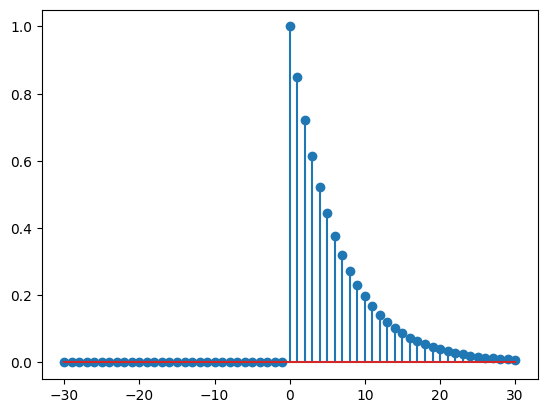

In [41]:
#generating Input

a = 0.85
An = np.power(a,abs(indexes))
Xn = An*Un
plt.figure()
plt.stem(indexes, Xn)

# 4. Computing Convolution Sum

Two algorithms are applied to calculate the convolution sum:

<ol>
    <li>Shifting Impulse Response and multiplying x[k]</li>
    <li>Iterating over each signal (Dr. Mattison) </li>
</ol>




## 4.1 First Algorithm:

Here, a loop is run over the simulation length and for each iteration $k$ , the impulse response $h[n]$ is shifted $h[n-k]$ and multiplied by the input signal at that time step $x[k]$:

$$y[n] = \sum x[k] \times h[n-k] $$
    
# Observation:
From the output, it can be visualized that the otuput inceases till N-1 point. The reason for this is that since the time points at N-1 and above sums for N times with positive values. but since the input value is decaying from 1,N-1 point has the highest sum. 


<StemContainer object of 3 artists>

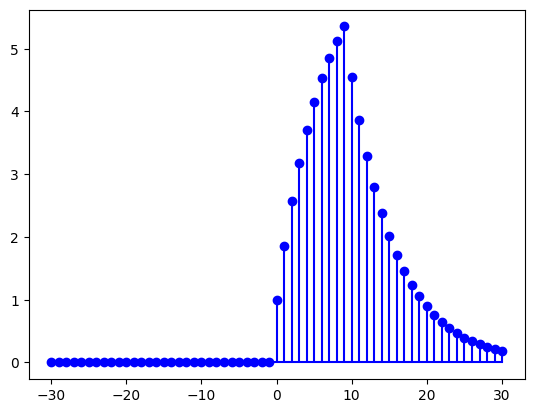

In [42]:
convolution_sum = np.zeros(len(indexes))


for k in range(len(indexes)):
    shift = indexes[k]
    Hn_k = apply_shift(Hn, shift)
    convolution_sum = convolution_sum + Xn[k]*Hn_k
 
  
plt.figure()
plt.stem(indexes, convolution_sum, linefmt = 'b-',basefmt = 'b-', markerfmt = 'bo')

## 4.2 Second Algorithm:

Here only the positive indices are taken and the unit step response for only bounding box of length N is considered for computation. 

## Here I have modified Dr. Mattison's code so that when i=0, sum wont be zero

<StemContainer object of 3 artists>

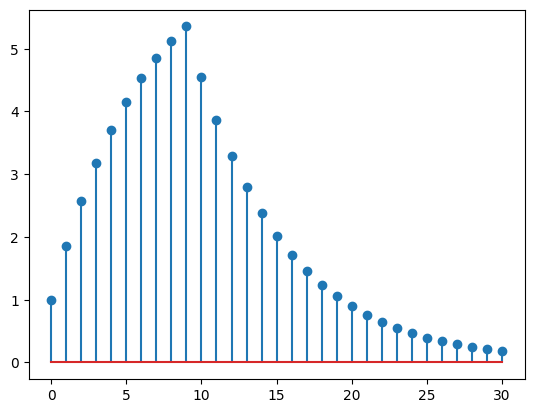

In [43]:
simulation_length = 31
N = 10
a = 0.85
n = np.arange(simulation_length)
x = np.power(a,n)
h = np.ones(N)


#taking the non zero part only as impulse response
y = np.zeros(simulation_length)

for i in range(len(y)):
    samplesToSum = N
    if i < N:
        samplesToSum = i+1 # i have modified this, because if i =0 then there should be one sum
    for j in range(samplesToSum):
        y[i] = y[i] + x[i - j]*h[N-1-j]

plt.stem(y)

## Simulating for three different a and N

Here it was observed that, for each case, the output value increased upto N-1 time. and as a increased, the decay in the output decrased. For a = 0.8 the output decreased rapidly after N-1 time. However, for a = 0.95 the rise in output upto N-1 point was gentle and the decay in output after N-1 point was also gentle.

Text(0.5, 0.98, 'Simulation for different a and N')

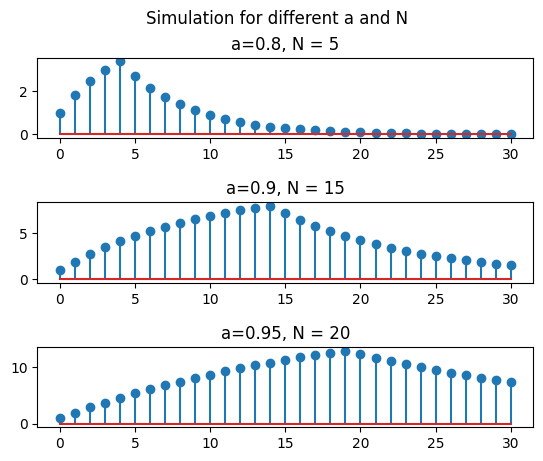

In [44]:
def get_convolution_sum(a,N):
    simulation_length = 31
    n = np.arange(simulation_length)
    x = np.power(a,n)
    h = np.ones(N)


    #taking the non zero part only as impulse response
    y = np.zeros(simulation_length)

    for i in range(len(y)):
        samplesToSum = N
        if i < N:
            samplesToSum = i+1 # i have modified this, because if i =0 then there should be one sum
        for j in range(samplesToSum):
            y[i] = y[i] + x[i - j]*h[N-1-j]
    return y

a = [0.8,0.9,0.95]
N = [5,15,20]

fig, ax = plt.subplots(3,1)

for i in range(len(a)):
    y = get_convolution_sum(a[i],N[i])
    ax[i].stem(y)
    ax[i].set_title(f'a={a[i]}, N = {N[i]}')

plt.subplots_adjust(hspace=0.8)
plt.suptitle('Simulation for different a and N')




# Simulating for different impulse response

## Observation: 
Due to the decay in impulse response, the output value till N-1 time is increasing very slowly.

Text(0.5, 0.98, 'Simulation for decaying h[n]')

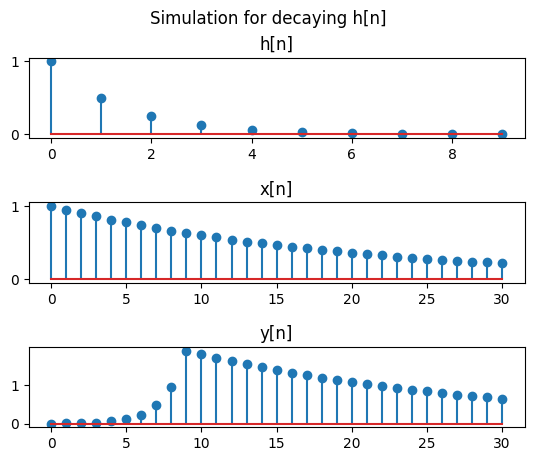

In [45]:
simulation_length = 31
N = 10
a = 0.95
n = np.arange(simulation_length)
x = np.power(a,n)
h = np.arange(N)
h = np.power(0.5,h)


#taking the non zero part only as impulse response
y = np.zeros(simulation_length)


fig, ax = plt.subplots(3,1)
for i in range(len(y)):
    samplesToSum = N
    if i < N:
        samplesToSum = i+1 # i have modified this, because if i =0 then there should be one sum
    for j in range(samplesToSum):
        y[i] = y[i] + x[i - j]*h[N-1-j]



ax[0].stem(h)
ax[0].set_title('h[n]')
ax[1].stem(x)
ax[1].set_title('x[n]')

ax[2].stem(y)
ax[2].set_title('y[n]')


plt.subplots_adjust(hspace=0.8)
plt.suptitle('Simulation for decaying h[n]')

## Below code genereates a animation to visualize convolution sum

<IPython.core.display.Javascript object>


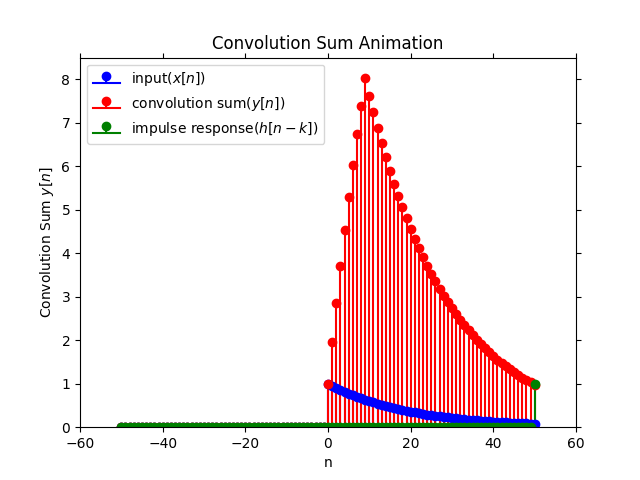

In [184]:

convolution_sum = np.zeros(len(indexes))
%matplotlib notebook
fig, ax = plt.subplots()

for k,i in enumerate(indexes):
    Hn_k = apply_shift(Hn, i)
    convolution_sum = convolution_sum + Xn[k]*Hn_k
    ax.clear()
    ax.stem(indexes, Xn, linefmt='b-', markerfmt='bo',basefmt='b-', label = 'input($x[n]$)')
    ax.stem(indexes,convolution_sum, linefmt='r-', markerfmt='ro',basefmt='r-', label = 'convolution sum($y[n]$)')
    ax.stem(indexes,Hn_k, linefmt='g-', markerfmt='go',basefmt='g-', label = 'impulse response($h[n-k]$)')
    ax.set_ylim(0,8.5)
    ax.set_xlim(-simulation_length-N,simulation_length+N)
    plt.legend()
    plt.xlabel('n')
    plt.title('Convolution Sum Animation')
    plt.ylabel('Convolution Sum $y[n]$')
    fig.canvas.draw()
    plt.pause(0.05)

## Exporting animation as video
This requires moviepy library

In [ ]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
 
convolution_sum = np.zeros(len(indexes))
%matplotlib notebook
fig, ax = plt.subplots(figsize = (8,8), dpi = 300)
# method to get frames
def make_frame(i):
    i = int(i)
    print(i)
    global convolution_sum
    k = indexes[i]
    Hn_k = apply_shift(Hn, k)
    convolution_sum = convolution_sum + Xn[i]*Hn_k
    ax.clear()
    ax.stem(indexes, Xn, linefmt='b-', markerfmt='bo',basefmt='b-', label = 'input($x[n]$)')
    ax.stem(indexes,convolution_sum, linefmt='r-', markerfmt='ro',basefmt='r-', label = 'convolution sum($y[n]$)')
    ax.stem(indexes,Hn_k, linefmt='g-', markerfmt='go',basefmt='g-', label = 'impulse response($h[n-k]$)')
    ax.set_ylim(0,8.5)
    ax.set_xlim(-simulation_length-N,simulation_length+N)
    plt.legend()
    plt.xlabel('n')
    plt.title('Convolution Sum Animation')
    plt.ylabel('Convolution Sum $y[n]$')
    fig.canvas.draw()
     
    # returning numpy image
    return mplfig_to_npimage(fig)
 
# creating animation
animation = VideoClip(make_frame, duration = 101)
 
# displaying animation with auto play and looping
animation.ipython_display(fps = 1, loop = True, autoplay = True, maxduration = 150)
